# This notebook demonstrates the process of:
- Accessing heat risk data from your own AWS S3 bucket 
- Reading it into pandas dataframe
- Merging with geospatial auxiliary data on local machine
- Data manipulation 
- Visualization data on a map

## There are two tasks for this example:
1. What is the heat risk distribution in California at tract level?
2. What is the heat risk distribution in United States at the state level?

## Prerequisites
This notebook assumes the following:
- Understanding of the general idea of the model and methodology behind the datasets: https://firststreet.org/research-library/heat-model-methodology
    - The FSF-EHM utilizes several existing methods from the heat science community combined with scalable computational techniques and satellite imagery to produce new high-resolution heat hazards across the contiguous United States (CONUS). U.S. Federal Open Data sources support the production of a high resolution extreme heat product that allows individuals, communities, businesses, and governments to better understand and prepare for their heat risks both today and 30 years into the future.


- Have an established AWS account that allows for the creation of an access key and has access to the First Street data.  This process is described in the ```How to access data on AWS.docx``` document.  Follow the directions for processing the data via the Amazon S3 Buckets.

Note: For the purposes of this this notebook, you may copy and paste the values from the provided `credentials.json` file instead of using your own AWS account credentials.

- Obtain the geospatial auxiliary data (https://catalog.data.gov/dataset/tiger-line-shapefile-2022-state-california-ca-census-tract) and downloaded to your local machine.
    The data should be in the directory `..\\Climate Risk data\\Auxiliary Data\\`. 
        If this is not the location of your data, modify the `auxilliaryDataDirectory` variable below to reflect the appropriate directory.
    
- Packages installed:
    * pandas
    * getpass
    * geopandas
    * matplotlib
    * folium
    * mapclassify

---
## Task 1 - What is the heat risk distribution in California at the tract level?

In [1]:
# Prompt the user for their secret key, access key, and URI for the S3 bucket
# Use getpass package to hide credentials
import getpass

tract_S3_URI = getpass.getpass('Enter tract S3 URI:') # this can be from the credentials file (tract_S3_URI)
key = getpass.getpass('Enter your aws_access_key_id:') # this can be from the credentials file
secret = getpass.getpass('Enter your aws_secret_access_key:') # this can be from the credentials file

Enter tract S3 URI:········
Enter your aws_access_key_id:········
Enter your aws_secret_access_key:········


In [2]:
#read heat risk tract data from S3 bucket into pandas dataframe
import pandas as pd

heatRiskTractData = pd.read_csv(
    tract_S3_URI, # S3 object URI
    storage_options={
        "key": key, # aws_access_key_id
        "secret": secret # aws_secret_access_key
    })

heatRiskTractData.head()

fips  count_property  count_heatfactor1  count_heatfactor2  \
0  1001020100           937.0                  0                  0   
1  1001020200          1130.0                  0                  0   
2  1001020300          1511.0                  0                  0   
3  1001020400          1887.0                  0                  0   
4  1001020501          1746.0                  0                  0   

   count_heatfactor3  count_heatfactor4  count_heatfactor5  count_heatfactor6  \
0                  0                  0                  0                113   
1                  0                  0                  0                 84   
2                  0                  0                  0                136   
3                  0                  0                  0                 16   
4                  0                  0                  0                  1   

   count_heatfactor7  count_heatfactor8  count_heatfactor9  count_heatfactor10  
0                818                  6                  0                   0  
1                962                 84                  0                   0  
2               1360                 15                  0                   0  
3               1863                  8                  0                   0  
4               1682                 63                  0                   0

In [3]:
# Define the location of our auxiliary data
auxilliaryDataDirectory = "..\\Climate Risk data\\Auxiliary Data\\"

In [4]:
# Read the tract geospatial data for California and rename the column
import geopandas as gpd

auxilliaryData_CA = gpd.read_file(f"{auxilliaryDataDirectory}tl_2022_06_tract.shp")
auxilliaryData_CA = auxilliaryData_CA.rename(columns = {'GEOID':'fips'}) # used to match the same column name 'fips' for merging purposes later
auxilliaryData_CA.head()

STATEFP COUNTYFP TRACTCE         fips     NAME              NAMELSAD  MTFCC  \
0      06      037  137504  06037137504  1375.04  Census Tract 1375.04  G5020   
1      06      037  138000  06037138000     1380     Census Tract 1380  G5020   
2      06      037  139200  06037139200     1392     Census Tract 1392  G5020   
3      06      087  120901  06087120901  1209.01  Census Tract 1209.01  G5020   
4      06      087  120902  06087120902  1209.02  Census Tract 1209.02  G5020   

  FUNCSTAT     ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S   3837562       0  +34.1480383  -118.5720594   
1        S   4472196       0  +34.1488008  -118.5910495   
2        S   1152028       0  +34.1756961  -118.5246446   
3        S  18372491       0  +37.0781624  -122.0154263   
4        S   6474889       0  +37.0628452  -122.0106243   

                                            geometry  
0  POLYGON ((-118.58119 34.14318, -118.58099 34.1...  
1  POLYGON ((-118.60573 34.14585, -118.60561 34.1...  
2  POLYGON ((-118.53082 34.18024, -118.52952 34.1...  
3  POLYGON ((-122.04607 37.07105, -122.04505 37.0...  
4  POLYGON ((-122.02513 37.04320, -122.02500 37.0...

In [5]:
# Adjust fips format and merge the auxilliary and the heat risk datasets.
# Use the FIPS code as the common key
heatRiskTractData.fips = heatRiskTractData['fips'].astype(str).str.zfill(11)
mergedHeatRiskTractData = pd.merge(heatRiskTractData, auxilliaryData_CA, on = 'fips')
mergedHeatRiskTractData.head()

fips  count_property  count_heatfactor1  count_heatfactor2  \
0  06001400100          1907.0                261               1444   
1  06001400200           663.0                  0                  0   
2  06001400300          1568.0                  0                  0   
3  06001400400          1133.0                  0                  0   
4  06001400500           926.0                  0                  0   

   count_heatfactor3  count_heatfactor4  count_heatfactor5  count_heatfactor6  \
0                 22                  0                  0                  0   
1                663                  0                  0                  0   
2               1568                  0                  0                  0   
3               1133                  0                  0                  0   
4                926                  0                  0                  0   

   count_heatfactor7  count_heatfactor8  ...  TRACTCE  NAME  \
0                  0                  0  ...   400100  4001   
1                  0                  0  ...   400200  4002   
2                  0                  0  ...   400300  4003   
3                  0                  0  ...   400400  4004   
4                  0                  0  ...   400500  4005   

            NAMELSAD  MTFCC FUNCSTAT    ALAND AWATER     INTPTLAT  \
0  Census Tract 4001  G5020        S  6945856      0  +37.8676563   
1  Census Tract 4002  G5020        S   586560      0  +37.8481378   
2  Census Tract 4003  G5020        S  1110840      0  +37.8405841   
3  Census Tract 4004  G5020        S   716138      0  +37.8482840   
4  Census Tract 4005  G5020        S   591424      0  +37.8485452   

       INTPTLON                                           geometry  
0  -122.2318813  POLYGON ((-122.24691 37.88535, -122.24665 37.8...  
1  -122.2495916  POLYGON ((-122.25792 37.84261, -122.25773 37.8...  
2  -122.2544782  POLYGON ((-122.26563 37.83764, -122.26556 37.8...  
3  -122.2574447  POLYGON ((-122.26183 37.84162, -122.26180 37.8...  
4  -122.2647353  POLYGON ((-122.26951 37.84858, -122.26937 37.8...  

[5 rows x 24 columns]

The original dataset quantifies the climate risk by assigning each properties within the geographical unit to one risk factor from 1 - 10, with 10 the most severe. In order to simplify the calculation, we create a new variable to derive the weighted risk by adding up the number of properties times factor index, then divided by the total counts of the properties to get the average risk.

In [6]:
# Derive the weighted average risk and store it in the dataframe
mergedHeatRiskTractData['average_risk'] = 0
for i in range (1,11):
    mergedHeatRiskTractData['average_risk'] += mergedHeatRiskTractData[f'count_heatfactor{i}'] * i
mergedHeatRiskTractData['average_risk'] /= mergedHeatRiskTractData['count_property']

# Subset with the attributes needed
final_data = mergedHeatRiskTractData[['fips', 'average_risk', 'geometry']]

# Display the final data
final_data

fips  average_risk  \
0     06001400100      1.685894   
1     06001400200      3.000000   
2     06001400300      3.000000   
3     06001400400      3.000000   
4     06001400500      3.000000   
...           ...           ...   
9102  06115040902      7.982014   
9103  06115041001      7.209486   
9104  06115041002      6.751831   
9105  06115041101      4.429434   
9106  06115041102      5.345219   

                                               geometry  
0     POLYGON ((-122.24691 37.88535, -122.24665 37.8...  
1     POLYGON ((-122.25792 37.84261, -122.25773 37.8...  
2     POLYGON ((-122.26563 37.83764, -122.26556 37.8...  
3     POLYGON ((-122.26183 37.84162, -122.26180 37.8...  
4     POLYGON ((-122.26951 37.84858, -122.26937 37.8...  
...                                                 ...  
9102  POLYGON ((-121.47722 39.13333, -121.47709 39.1...  
9103  POLYGON ((-121.63637 39.24608, -121.63629 39.2...  
9104  POLYGON ((-121.46947 39.33348, -121.46900 39.3...  
9105  POLYGON ((-121.37257 39.37358, -121.37253 39.3...  
9106  POLYGON ((-121.32407 39.36282, -121.32331 39.3...  

[9107 rows x 3 columns]

In [7]:
# Prepare a georeferenced dataframe
crs = {'init':'EPSG:4326'} # EPSG:4326 is a popular standard coordinate system 
georeferencedData = gpd.GeoDataFrame(final_data, crs = crs, geometry = final_data.geometry)

<AxesSubplot:>

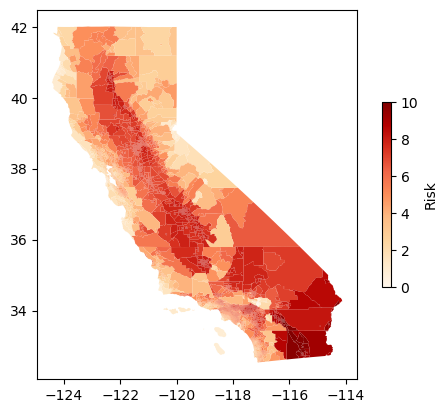

In [8]:
# Plot the results
georeferencedData.plot(column = 'average_risk', cmap = 'OrRd',
                       legend = True, legend_kwds={'shrink': 0.5, 'label':'Risk'},
                       markersize = 10)

---
## Task 2 - What is the heat risk distribution in United States at states level?

In [9]:
# Prompt the user for the URI for the state's S3 data bucket
# Note: This can be from the credentials file (state_S3_URI)
state_S3_URI = getpass.getpass('Enter state_S3_URI:')

Enter state_S3_URI:········


In [10]:
# Read heat risk state data from S3 bucket into pandas dataframe
USHeatRiskData = pd.read_csv(
    state_S3_URI, #S3 object URI
    storage_options={
        "key": key, # aws_access_key_id
        "secret": secret # aws_secret_access_key
    })

# Display the first few rows of the state data
USHeatRiskData.head()

fips        name  count_property  count_heatfactor1  count_heatfactor2  \
0     1     Alabama         3041645                  0                  0   
1     4     Arizona         3312010              16207              87375   
2     5    Arkansas         2009228                  0                 30   
3     6  California        11422746             295547             489737   
4     8    Colorado         2517292             368358             408104   

   count_heatfactor3  count_heatfactor4  count_heatfactor5  count_heatfactor6  \
0               2838              73200             644416            1089677   
1              79985             115004             118383             206880   
2              14150             276370             534109             875228   
3             897374            1797711            1824949            1880287   
4            1338055             278285              82617                347   

   count_heatfactor7  count_heatfactor8  count_heatfactor9  count_heatfactor10  
0             603390             321310             185566              120907  
1             221160             702896            1729676               20162  
2             307498               1586                  1                   0  
3            2235173            1551981             204125              136694  
4                  0                  0                  0                   0

In [11]:
# Import the geopandas library to deal with GIS shape data
import geopandas as gpd

# Read data that has the geospatial information for sub-county areas
auxilliaryData_US = gpd.read_file(f"{auxilliaryDataDirectory}cb_2018_us_state_500k.shp")
auxilliaryData_US = auxilliaryData_US.to_crs("EPSG:4326")
auxilliaryData_US = auxilliaryData_US.rename(columns = {'GEOID':'fips'})

# Display the first few rows of the geospatial data
auxilliaryData_US.head()

STATEFP   STATENS     AFFGEOID fips STUSPS            NAME LSAD  \
0      28  01779790  0400000US28   28     MS     Mississippi   00   
1      37  01027616  0400000US37   37     NC  North Carolina   00   
2      40  01102857  0400000US40   40     OK        Oklahoma   00   
3      51  01779803  0400000US51   51     VA        Virginia   00   
4      54  01779805  0400000US54   54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...  
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...  
2  POLYGON ((-103.00257 36.52659, -103.00219 36.6...  
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...  
4  POLYGON ((-82.64320 38.16909, -82.64300 38.169...

In [12]:
# Calculate the weighted average risk for each sub-county area in WV
USHeatRiskData['average_risk'] = 0
for i in range (1,11):
    USHeatRiskData['average_risk'] += USHeatRiskData[f'count_heatfactor{i}'] * i
USHeatRiskData['average_risk'] /= USHeatRiskData['count_property']

In [13]:
# Merge both datasets with the same column "fips" and extract the columns we are interested in
USHeatRiskData.fips = USHeatRiskData['fips'].astype(str).str.zfill(2)
result = pd.merge(USHeatRiskData, auxilliaryData_US, on = 'fips')
final_data = result[['fips', 'name', 'average_risk', 'geometry']]

# Display the first few rows of the final data
final_data.head()

fips        name  average_risk  \
0   01     Alabama      6.488210   
1   04     Arizona      7.748804   
2   05    Arkansas      5.591743   
3   06  California      5.500479   
4   08    Colorado      2.672331   

                                            geometry  
0  MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...  
1  POLYGON ((-114.81629 32.50804, -114.81432 32.5...  
2  POLYGON ((-94.61783 36.49941, -94.61765 36.499...  
3  MULTIPOLYGON (((-118.60442 33.47855, -118.5987...  
4  POLYGON ((-109.06025 38.59933, -109.05954 38.7...

In [14]:
# Prepare the geodataframe
crs = {'init':'EPSG:4326'}
georeferencedData = gpd.GeoDataFrame(final_data, crs = crs, geometry = final_data.geometry)

In [15]:
# Create an interactive map to explore the data
georeferencedData.explore(
    column = "average_risk",  # make choropleth based on "average_risk" column
    tooltip = "name",  # show "name" value in tooltip (on hover)
    popup = True,  # show all values in popup (on click)
    tiles = "CartoDB positron",  # use the "CartoDB positron" style tiles
    cmap = "OrRd",  # use "OrRd" matplotlib colormap
    style_kwds = dict(color = "black"),# use black outline
    legend_kwds = dict(caption = "Heat Risk") # rename legend
)

## This concludes this example